# Heart Disease Prediction  By Ghaith Msadek :Exam 08/01/2022




Plan mtaa3 notebook :

1. [Data description](#data-desc)
2. [Importing Libraries & setting up environment](#imp-lib)
3. [Loading dataset](#data-load)
4. [Data Cleaning & Preprocessing](#data-prep)
5. [Exploratory Data Analysis](#data-eda)
6. [OUtlier Detection & Removal](#data-out)
7. [Training & Test Split](#data-train)
8. [Cross Validation](#cross-val)
9. [Model Building](#data-model)
10. [Model evaluation & comparison](#model-eval)<br>
11. [Conclusion](#data-conc)

## 1. Dataset description<a id='data-desc'></a>

 dataset  FIH  11 features W 1 target variable. fIH  6 categoricals(nominal) variables w 5 numeric variables. 
 Les details mtaa3 el Features;

**1. Age:** Patients Age in years (Numeric)<br>
**2. Sex:** Gender of patient (Male - 1, Female - 0) (Nominal)<br>
**3. Chest Pain Type:** Naaw3 el ChestPain : 1 typical(wji3a causé par le coeur), 2 atypical angina(wji3a par forcément mel coeur tnjm tkoun mel respiration etc), 3 non-anginal pain(maandha hata da5l bel 9alb), 4 asymptomatic(silent killer) (Nominal)<br>
**4. resting bp s:** Niveau mtaa3 l'blood pressure wel partient merté7(resting) in mm/HG (Numerical)<br>
**5. cholestrol:** Serum cholestrol in mg/dl (Numeric)<br>
**6. fasting blood sugar:** Taux de sucre dans le sang à jeun > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)<br>
**7. resting ecg:** Result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Nominal)<br>
**8. max heart rate:** Max mtaa3 da9at l9alb (Numeric)<br>
**9. exercise angina:** Angina pain mba3 ma taa3ml SPORT : 0 = NO ,1 = Yes (Nominal)<br>
**10. oldpeak:** Exercise induced ST-depression in comparison with the state of rest (Numeric)<br>
**11. ST slope:** ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal)<br>

#### Target variable
**12. target:** Label eli bch nprédictiweh  1 Maantha patient aandou risk mtaa3 9alb  and 0  Maantha Patient normal.


## 2. Importing Libraries<a id='imp-lib'></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

# data pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation XXXXXXXXXXXXXXXXXXXXXXXXXXXx
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold


# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


from scipy import stats


## 3. Loading Dataset<a id='data-load'></a>

In [2]:
dt = pd.read_csv('heart_final.csv')

5anchoufou Sample mel data set head(les 5 premiers)

In [3]:
dt.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


Kima tchoufou Fama features lazmhom ikounou categorical Encoded w édhéka chneya bch nammlou f next step ,we'll Be
encoding features to their respective category as per the dataset description.


##### 4. Data Cleaning & Preprocessing <a id='data-prep'></a>

 Bch nbdlou les nom des columns  into  propriate ones  w bch  Encondiw features lel Categorical Varaibles kima eli fel dataDescription Guys !


In [4]:




# renaming features to proper name
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [5]:
# converting features to categorical features 

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'



dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'



dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt["sex"] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')

In [6]:
#Lets Check kén Tbadlou walé :
dt['chest_pain_type'].value_counts()

asymptomatic        625
non-anginal pain    283
atypical angina     216
typical angina       66
Name: chest_pain_type, dtype: int64

In [7]:
dt['rest_ecg'].value_counts()

normal                          684
left ventricular hypertrophy    325
ST-T wave abnormality           181
Name: rest_ecg, dtype: int64

In [8]:
dt['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
0                1
Name: st_slope, dtype: int64

In [9]:
#Bch ndropiw el Ligne li féha st_slope =0
dt.drop(dt[dt.st_slope ==0].index, inplace=True)
#Lets Check  Again :
dt['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
Name: st_slope, dtype: int64

In [10]:
# 5anchoufou sample ba3d el Encoding tawa : 
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


Kima 9a3din tchoufou les Features Categorical Encodinéhom kima el Data Description , tawa 5anchoufou fama Missing Values walé ?

In [11]:
## Missing Values CHECK :
dt.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

So, Famech hata missing Value . Next bch nexploriw el dataset

## 5. Exploratory Data Analysis (EDA) <a id='data-eda'></a>

In [12]:
#  Nebdew  bel   shape mta3 dataset
dt.shape

(1189, 12)

So,fama total  mtaa6 1189 records w  11 features w  1 target variable LABEL .
Lets Describe the  numerical and categorical features.

In [13]:
# summary statistics mtaa3  numerical columns
dt.describe(include =[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


Kima 9a3din tchoufou el  resting_blood_pressure w cholestrol féhom SOME  outliers  Andhom el MIN  0 W zeda l  cholestrol Andou  outlier on upper side El max VALUE : 603.

In [14]:
# summary statistics  mtaa3  categorical columns
dt.describe(include =[np.object])

,sex,chest_pain_type,rest_ecg,st_slope
count,1189,1189,1189,1189
unique,2,4,3,3
top,male,asymptomatic,normal,flat
freq,908,625,683,582


### Distribution of Heart disease (target variable)

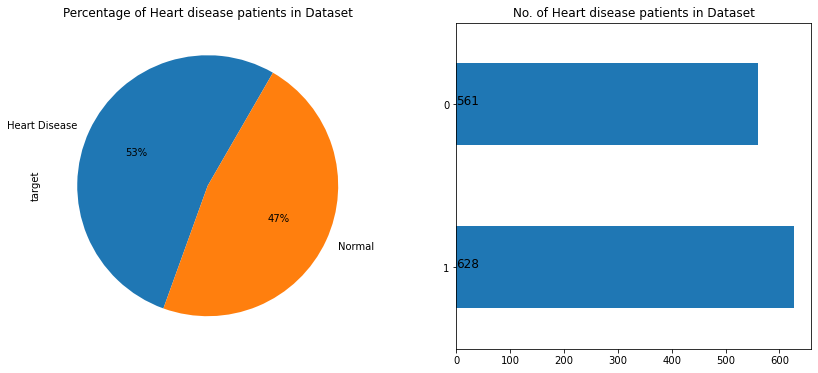

In [15]:
# Plotting attribution of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dt['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dt["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

El dataset is balanced  Fih  629 heart disease patients w 561 normal patients THATS FAAAIR !!

### Checking Gender & Agewise Distribution

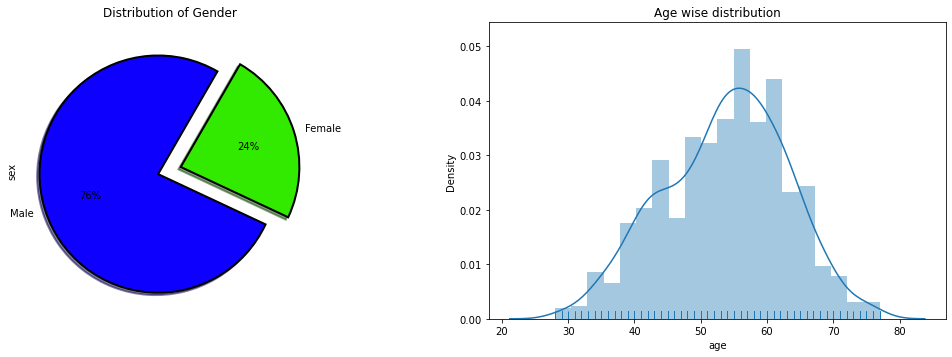

In [16]:
plt.figure(figsize=(18,12))
plt.subplot(221)
dt["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(dt['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

MEl Plot najmou Nchoufou eli  males percentage Akber b barcha mel  females  wel Age moyen mtaa3 partients is around 55.

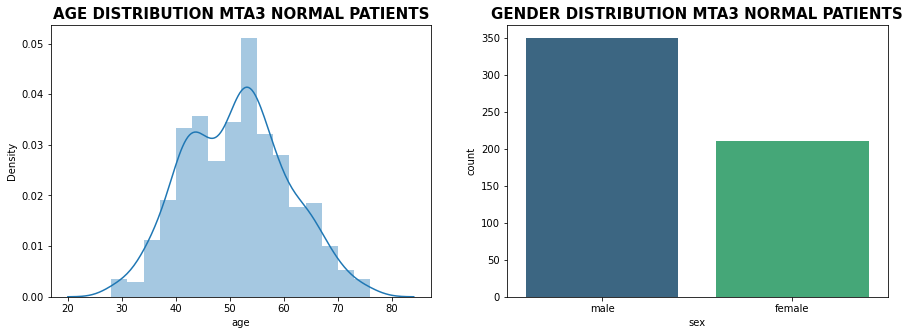

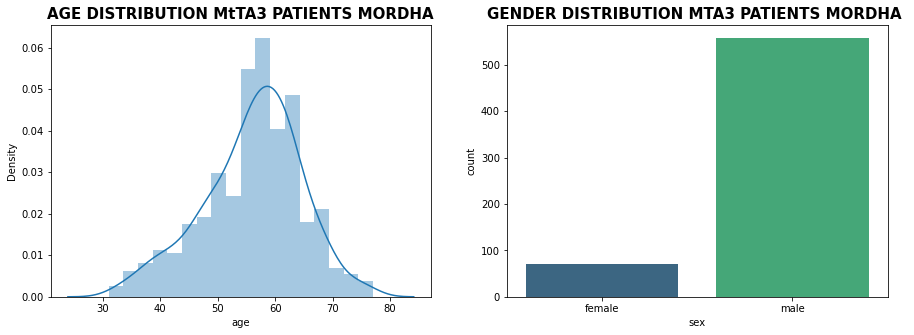

In [17]:
# Bch nasn3ou 2 DFs mtaa3 Eli mordha bel 9alb w el Normal 

mridh=dt[dt['target']==1]

normal=dt[dt['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(normal['age'])
plt.title('AGE DISTRIBUTION MTA3 NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))

sns.countplot(normal['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION MTA3 NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting  patients Mordha

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(mridh['age'])
plt.title('AGE DISTRIBUTION MtTA3 PATIENTS MORDHA', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(mridh['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION MTA3 PATIENTS MORDHA ', fontsize=15, weight='bold' )
plt.show()

Kima nchoufou Rjél Mordha akther par rapport aal Nsé( AMa tensewch lDataset fih Akther male que Female).

L'age Moyen mtaa3 Mordha a peu prés Bin 58 w 60 Sné .

### Distribution of Chest Pain Type

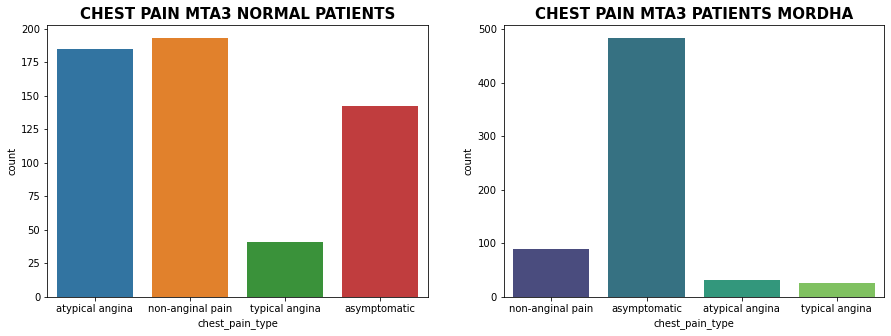

In [18]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(normal['chest_pain_type'])
plt.title('CHEST PAIN MTA3 NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting  patients Mordha
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(mridh['chest_pain_type'], palette='viridis')
plt.title('CHEST PAIN MTA3 PATIENTS MORDHA', fontsize=15, weight='bold' )
plt.show()

### Distribution of Rest ECG

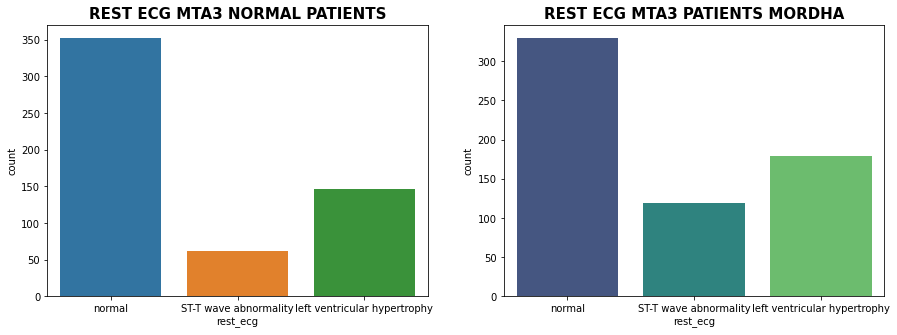

In [19]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(normal['rest_ecg'])
plt.title('REST ECG MTA3 NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting  patients Mordha 
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(mridh['rest_ecg'], palette='viridis')
plt.title('REST ECG MTA3 PATIENTS MORDHA', fontsize=15, weight='bold' )
plt.show()

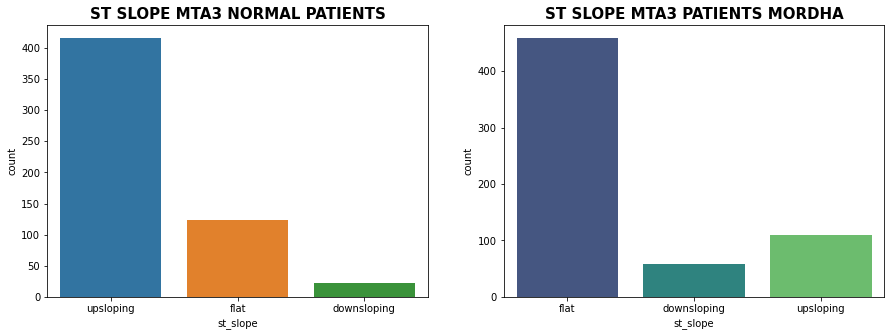

In [20]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(normal['st_slope'])
plt.title('ST SLOPE MTA3 NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(mridh['st_slope'], palette='viridis')
plt.title('ST SLOPE MTA3 PATIENTS MORDHA', fontsize=15, weight='bold' )
plt.show()

### Distribution of Numerical features

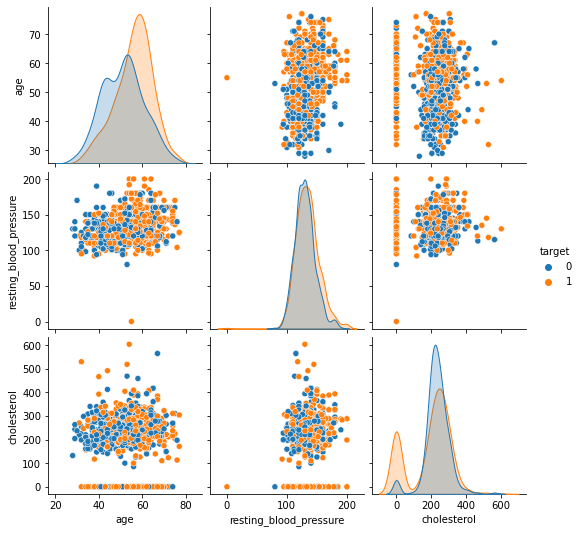

In [21]:
sns.pairplot(dt, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )

On remarque que  kol ma l'age yatla3 el RIsk yatlaa3 Aswell :3

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='cholesterol'>

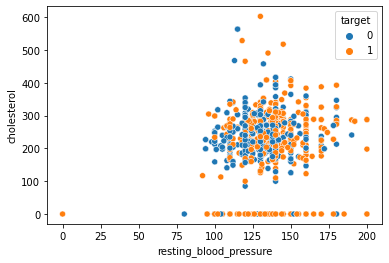

In [22]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = dt)

Nahjmou nchoufou el  outliers  ELi chofnehom bekri bel Describe 

## 6. Outlier Detection & Removal <a id='data-out'></a>

### Detecting outlier using z-score
![](https://i.ibb.co/jDHP7Sj/Z-score-formula.jpg)

In [23]:
# exemple :  dans data=[1, 2, 2, 2, 3, 1, 1, 15, 2, 2, 2, 3, 1, 1, 2]

#        Clearly, 15 is an outlier in this dataset. ; 
data = [1, 2, 2, 2, 3, 1, 1, 15, 2, 2, 2, 3, 1, 1, 2]
mean = np.mean(data)
std = np.std(data)
print('mean of the dataset is', mean)
print('std. deviation is', std)


threshold = 3
outlier = []
for i in data:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

mean of the dataset is 2.6666666666666665
std. deviation is 3.3598941782277745
outlier in dataset is [15]


In [24]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

dt_numeric = dt[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [25]:
dt_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [26]:
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(dt_numeric))
print(z)

[[1.46626567 0.4281359  0.7752277  1.26430092]
 [0.5035987  1.51737007 0.29951621 0.63725935]
 [1.78715466 0.11648118 0.71606748 1.63576637]
 ...
 [0.35210527 0.11648118 0.78265797 0.96953469]
 [0.35210527 0.11648118 0.2526458  1.34268112]
 [1.68019167 0.31921249 0.34881639 1.30349102]]


Haka s3ib Naarfou énéhom el outliers so we will now define threshold!

In [27]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074], dtype=int64), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1], dtype=int64))


mat5afch mel réstulat .Array Louwa féha  list Mtaa3 row numbers wel  second array  Hia respective column numbers, MAAANTHAAAAAAAA :  (z[30][2] have a Z-score higher than 3  ).Fama  17 data points Li houama outliers.

In [28]:
#filtering outliers , Nkhaliw kén el points Eli ta7t 3 el threshhold
dt = dt[(z < 3).all(axis=1)]

In [29]:
# Good Bye Outliers tawa 5anchoufou el Shape kifeh wala 
dt.shape

(1172, 12)

Bieen !! 17 data points eli houma  outliers Tna7aw .

W tawa 9bal maa naamlou  splitting dataset Into  train w test ;Lazm n encondiw categorical variables as dummy variables  wala  bel OHE , on verra ! W enfin  n9assmou el features w Label mté3na 

In [30]:
## encoding categorical variables:
# RQ : houni Hatina drop_first=True bch na9sou mel Nbr de columns générés, par Exemple sexe fih Female w male
# kén maamlnéch drop_first = true ,bch tjina sex_male w sex_female donc bch na9sou ala rwé7na les features 
dt = pd.get_dummies(dt, drop_first=True)

dt.head()


,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,1,1,0,0,0,1,0,1
1,49,160,180,0,156,0,1.0,1,0,0,1,0,0,1,1,0
2,37,130,283,0,98,0,0.0,0,1,1,0,0,0,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,0,1,1,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,0,1,0,1


In [31]:

# Nchoufou tawa   shape Mtaa3 dataset
dt.shape

(1172, 16)

In [32]:
# Lazm n9assmou datasey lel X and Y  Features and Label :
X = dt.drop(['target'],axis=1)
y = dt['target']

## Checking Correlation 

<AxesSubplot:title={'center':'Correlation with Diabetes'}>

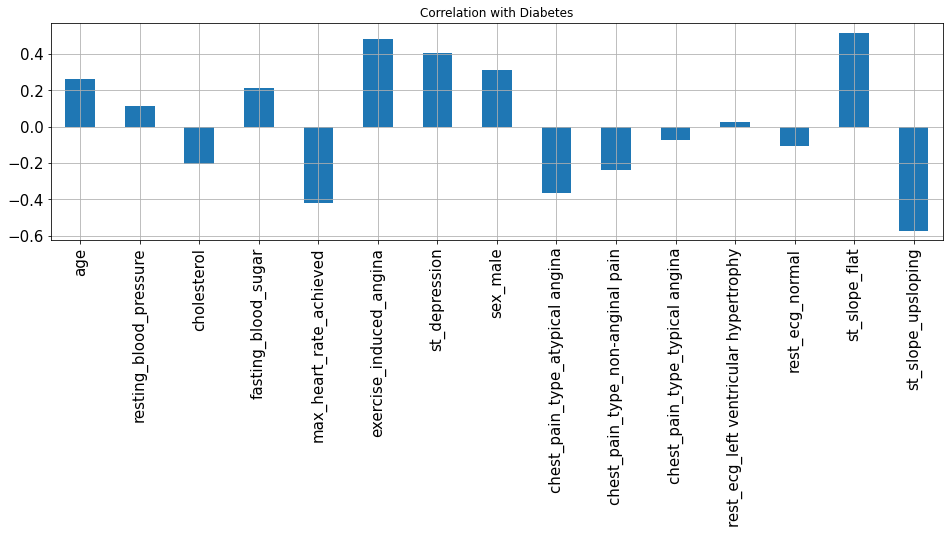

In [33]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)


## 7. Train Test Split <a id='data-train'></a>

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [35]:
## checking distribution of traget variable  Fel train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
1    491
0    446
Name: target, dtype: int64
Distribution of traget variable in test set
1    123
0    112
Name: target, dtype: int64


In [36]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(937, 15)
(937,)
------------Test Set------------------
(235, 15)
(235,)


### feature normalization
Fel etape hédhi bch Nrodou tout les numeric features entre 0 et 1

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
478,0.673469,0.193548,0.000000,1,0.303704,1,0.454545,1,0,0,0,0,1,0,0
253,0.673469,0.354839,0.594705,0,0.355556,1,0.194805,1,0,0,0,0,0,0,1
273,0.551020,0.516129,0.409369,0,0.466667,1,0.584416,1,0,0,0,0,1,1,0
111,0.591837,0.623656,0.519348,0,0.185185,1,0.584416,1,0,0,0,0,1,1,0
50,0.448980,0.408602,0.474542,0,0.400000,1,0.454545,1,0,0,0,0,1,1,0


In [38]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
1024,0.693878,0.301075,0.572301,0,0.266667,0,0.376623,1,1,0,0,1,0,1,0
182,0.469388,0.408602,0.456212,0,0.614815,0,0.194805,1,1,0,0,0,1,0,1
785,0.346939,0.494624,0.480652,0,0.629630,1,0.220779,0,0,0,0,1,0,1,0
924,0.591837,0.623656,0.562118,0,0.333333,1,0.272727,1,0,0,0,1,0,1,0
780,0.612245,0.387097,0.527495,0,0.466667,1,0.584416,1,0,0,0,1,0,1,0


## 8. Cross Validation <a id='cross-val'></a>

Fel etape hédhi  Bch nasn3ou  different baseline models w naamloulhom 10-fold cross validationw nchoufou enéhouu Ahsen Model !

In [39]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [40]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb
# fonction bch ninitialiw el baseline mte3na
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000)))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500)))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100)))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000)))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

# Foction Bch naamlou 10-fold cross validation lel les model LKOL
def BasedLine2(X_train, y_train,models):
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [41]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR_L2: 0.851704 (0.051909)
KNN7: 0.851659 (0.047773)
KNN5: 0.843079 (0.043544)
KNN9: 0.857001 (0.040182)
KNN11: 0.852745 (0.039732)
CART: 0.859186 (0.029781)
NB: 0.845310 (0.048020)
SVM Linear: 0.852803 (0.052849)
SVM RBF: 0.852745 (0.044010)
AB: 0.853832 (0.028773)
GBM: 0.890094 (0.038087)
RF_Ent100: 0.933871 (0.037369)
RF_Gini100: 0.929604 (0.039815)
ET100: 0.921059 (0.030846)
ET500: 0.923198 (0.031771)
MLP: 0.869835 (0.034770)
SGD3000: 0.833562 (0.047473)
[23:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:29:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[23:29:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:29:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:29:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:29:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## 9. Model building <a id='data-model'></a>

### Random Forest Classifier (criterion = 'entropy')

In [42]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

### Multi Layer Perceptron

In [43]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)




### K nearest neighbour (n=9)

In [44]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

### Extra Tree Classifier (n_estimators=500)

In [45]:
et_100 = ExtraTreesClassifier(n_estimators= 100)
et_100.fit(X_train,y_train)
y_pred_et_100 = et_100.predict(X_test)

### XGBoost (n_estimators=500)

In [46]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

[23:30:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Support Vector Classifier (kernel='linear')

In [47]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

### Stochastic Gradient Descent

In [48]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

### Adaboost Classifier

In [49]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

### decision Tree Classifier (CART)

In [50]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

### gradient boosting machine 

In [51]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

## 10. Model Evaluation  <a id='model-eval'></a>

 Fel Etape hédhi Bch N3arfou bel evaluation metrics ELi bch nesta3mlohom Al Models. T
 éli Houmaa **sensitivity, specificity, Precision, F1-measure, Geometric mean and mathew correlation coefficient Et finally ROC AUC curve**
 


### Mathew Correlation coefficient (MCC)

The Matthews correlation coefficient (MCC), instead, is a more reliable statistical rate which produces a high score only if the prediction obtained good results in all of the four confusion matrix categories (true positives, false negatives, true negatives, and false positives), proportionally both to the size of positive elements and the size of negative elements in the dataset.

![](https://i.ibb.co/mH6MmG4/mcc.jpg)

### Log Loss
Logarithmic loss  measures the performance of a classification model where the prediction input is a probability value between 0 and 1. The goal of our machine learning models is to minimize this value. A perfect model would have a log loss of 0. Log loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high log loss.

The graph below shows the range of possible log loss values given a true observation (isDog = 1). As the predicted probability approaches 1, log loss slowly decreases. As the predicted probability decreases, however, the log loss increases rapidly. Log loss penalizes both types of errors, but especially those predications that are confident and wrong!

![](https://i.ibb.co/6BdDczW/log-loss.jpg)

### F1 Score

 F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

**F1 Score = 2*(Recall * Precision) / (Recall + Precision)**

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.906383,0.879699,0.95122,0.857143,0.914062,0.904181,3.233472,0.814595


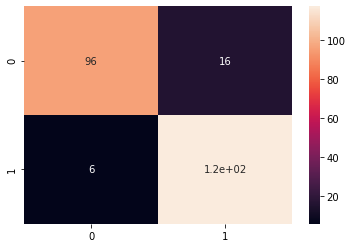

In [52]:
CM=confusion_matrix(y_test,y_pred_rfe)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_rfe)
acc= accuracy_score(y_test, y_pred_rfe)
roc=roc_auc_score(y_test, y_pred_rfe)
prec = precision_score(y_test, y_pred_rfe)
rec = recall_score(y_test, y_pred_rfe)
f1 = f1_score(y_test, y_pred_rfe)

mathew = matthews_corrcoef(y_test, y_pred_rfe)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

## Comparison with other Models

In [54]:
data = {        'MLP': y_pred_mlp, 
                'KNN': y_pred_knn, 
                'EXtra tree classifier': y_pred_et_100,
                'XGB': y_pred_xgb, 
                'SVC': y_pred_svc, 
                'SGD': y_pred_sgd,
                'Adaboost': y_pred_ada, 
                'CART': y_pred_decc, 
                'GBM': y_pred_gbm }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.906383,0.879699,0.951220,0.857143,0.914062,0.904181,3.233472,0.814595
1,MLP,0.821277,0.795620,0.886179,0.750000,0.838462,0.818089,6.172983,0.644418
2,KNN,0.808511,0.786765,0.869919,0.741071,0.826255,0.805495,6.613907,0.618029
3,EXtra tree classifier,0.897872,0.877863,0.934959,0.857143,0.905512,0.896051,3.527419,0.796509
4,XGB,0.906383,0.879699,0.951220,0.857143,0.914062,0.904181,3.233472,0.814595
5,SVC,0.825532,0.801471,0.886179,0.758929,0.841699,0.822554,6.026006,0.652539
6,SGD,0.812766,0.784173,0.886179,0.732143,0.832061,0.809161,6.466937,0.628251
7,Adaboost,0.834043,0.813433,0.886179,0.776786,0.848249,0.831482,5.732052,0.668866
8,CART,0.829787,0.821705,0.861789,0.794643,0.841270,0.828216,5.879019,0.658875
9,GBM,0.855319,0.829630,0.910569,0.794643,0.868217,0.852606,4.997178,0.712384


### Findings
tatla3 Tahbt yab9a Dima RFC a7sén Model  :c

In [ ]:
# RFC Hyperparameter Tuning

n_estimators = [100, 300, 500, 800, 1200,1400,1500,1600]
max_depth = [5, 8, 15, 25, 30,35,40,50,60]
min_samples_split = [2, 5, 10, 15,30,50, 100]
min_samples_leaf = [1, 2, 5, 10] 
forest = RandomForestClassifier(random_state = 1)


hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)

bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 2016 candidates, totalling 6048 fits


In [ ]:
print(grid_search.best_params_)


## Soft voting

In [55]:
rf_best = RandomForestClassifier(criterion='entropy',n_estimators=100,bootstrap= True, max_depth=100, max_features=2,min_samples_leaf=4,min_samples_split=8)
rf_best.fit(X_train, y_train)
y_pred_rf_best = rf_best.predict(X_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.859574,0.835821,0.910569,0.857143,0.871595,0.85707,4.850201,0.720497


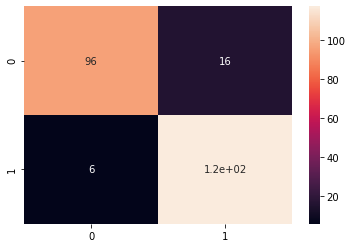

In [56]:
CM=confusion_matrix(y_test,y_pred_rfe)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_rf_best)
acc= accuracy_score(y_test, y_pred_rf_best)
roc=roc_auc_score(y_test, y_pred_rf_best)
prec = precision_score(y_test, y_pred_rf_best)
rec = recall_score(y_test, y_pred_rf_best)
f1 = f1_score(y_test, y_pred_rf_best)

mathew = matthews_corrcoef(y_test, y_pred_rf_best)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [57]:
import xgboost as xgb
clf1=RandomForestClassifier(criterion='entropy',n_estimators=100)

clf2=DecisionTreeClassifier()
clf3=xgb.XGBClassifier(n_estimators= 1000)
clf4=ExtraTreesClassifier(n_estimators= 500)

clf5=GradientBoostingClassifier(n_estimators=100,max_features='sqrt')


eclf1 = VotingClassifier(estimators=[('rfe', clf1), ('decc', clf2), ('xgb', clf3),('ET',clf4),('gb',clf5),], 
                         voting='soft', weights=[4,1,2,3,1])
eclf1.fit(X_train,y_train)
y_pred_sv =eclf1.predict(X_test)

[23:34:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Soft Voting,0.897872,0.861314,0.95935,0.830357,0.907692,0.894853,3.527429,0.799934


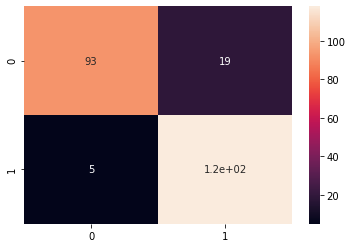

In [58]:
CM=confusion_matrix(y_test,y_pred_sv)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_sv)
acc= accuracy_score(y_test, y_pred_sv)
roc=roc_auc_score(y_test, y_pred_sv)
prec = precision_score(y_test, y_pred_sv)
rec = recall_score(y_test, y_pred_sv)
f1 = f1_score(y_test, y_pred_sv)

mathew = matthews_corrcoef(y_test, y_pred_sv)
model_results =pd.DataFrame([['Soft Voting',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

## Feature Importance

<AxesSubplot:>

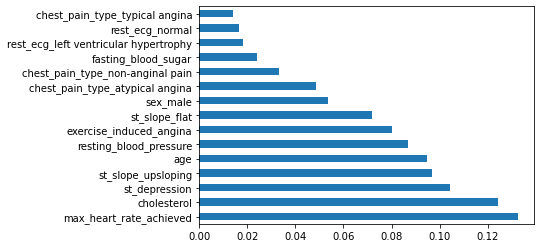

In [59]:
feat_importances = pd.Series(rf_ent.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

## 13. Conclusion  <a id='data-conc'></a>


- Donc el  random forest algorithm Ahsen Performance 3mal
-  top 5 Aktehr features Important:
1. **Max heart Rate achieved**<br>
2. **Cholestrol**<br>
3. **st_depression**<br>
4. **Age**<br>
5. **exercise_induced_angina**<br>
